# Batman Word Cloud

## Scrape the Dark Knight Rises movie script 

In [42]:
# If you're in Colaboratory, please uncomment below to install nltk packages into your environment

# import nltk
# nltk.download('stopwords')

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
movie_script_html = "http://www.imsdb.com/scripts/Dark-Knight-Rises,-The.html"

In [4]:
raw_html = urlopen(movie_script_html)

In [5]:
html = raw_html.read()
soup = BeautifulSoup(html, 'html.parser')

In [6]:
script = soup.find('td', attrs={'class': 'scrtext'})

In [9]:
batman = script.text
print(type(batman))

<class 'str'>


In [13]:
sample = batman[:800]
print(sample)




 
                          THE DARK KNIGHT RISES



                               Written by

                   Jonathan Nolan & Christopher Nolan                        

                         

                                Story by

                   Christopher Nolan & David S. Goyer





          BLACK SCREEN.

           GORDON (V.O)
           Harvey Dent was needed. He was
           everything Gotham has been crying
           out for. He was...a hero. Not the
           hero we deserved - the hero we
           needed. Nothing less than a knight,
           shining...

                         
          The sound of cracking. Splintering. A shape appears, in ice.
          The shape of a BAT. The ice disintegrates...

             


## Split text into list of words

In [14]:
words_list = sample.split()

In [15]:
words_list[:17]

['THE',
 'DARK',
 'KNIGHT',
 'RISES',
 'Written',
 'by',
 'Jonathan',
 'Nolan',
 '&',
 'Christopher',
 'Nolan',
 'Story',
 'by',
 'Christopher',
 'Nolan',
 '&',
 'David']

## Import and remove stop words

In [16]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english')
print(stopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [61]:
stopWords.append(['int', 'ext'])

In [48]:
example_words = words_list[:20]

for word in example_words:
    print(word)

THE
DARK
KNIGHT
RISES
Written
by
Jonathan
Nolan
&
Christopher
Nolan
Story
by
Christopher
Nolan
&
David
S.
Goyer
BLACK


## Clean text and remove stop words function

In [22]:
import re

In [24]:
for word in example_words:
    lower_word = word.lower()
    clean_word = re.sub(r'[^a-z ]+', '', lower_word)
    if clean_word not in stopWords:
        print(clean_word)

dark
knight
rises
written
jonathan
nolan

christopher
nolan
story
christopher
nolan

david
goyer
black


In [49]:
def clean_remove_stopwords(text):
    
    word_list = text.split()
    clean_word_list = []
    
    for word in word_list:
        lower_word = word.lower()
        clean_word = re.sub(r'[^a-z ]+', '', lower_word)
        
        if clean_word not in stopWords:
            clean_word_list.append(clean_word)
    
    return clean_word_list

In [50]:
words = clean_remove_stopwords(batman)

In [51]:
len(words)

18237

In [52]:
words[:20]

['dark',
 'knight',
 'rises',
 'written',
 'jonathan',
 'nolan',
 '',
 'christopher',
 'nolan',
 'story',
 'christopher',
 'nolan',
 '',
 'david',
 'goyer',
 'black',
 'screen',
 'gordon',
 'vo',
 'harvey']

In [53]:
string_words = " ".join(words)
string_words[:200]

'dark knight rises written jonathan nolan  christopher nolan story christopher nolan  david goyer black screen gordon vo harvey dent needed everything gotham crying wasa hero hero deserved  hero needed'

## Create word cloud

In [ ]:
# If you're in Colaboratory, please uncomment below to install wordcloud

# !pip install wordcloud

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [55]:
wc = WordCloud(background_color="black",
               height=1000,
                width=1000,
                colormap='YlGnBu',
                max_words=300,
                relative_scaling=0.5,
                normalize_plurals=False,
                mask=None)

word_cloud = wc.generate(string_words)

You can find different colormaps here: https://matplotlib.org/users/colormaps.html

In [56]:
type(word_cloud)

wordcloud.wordcloud.WordCloud

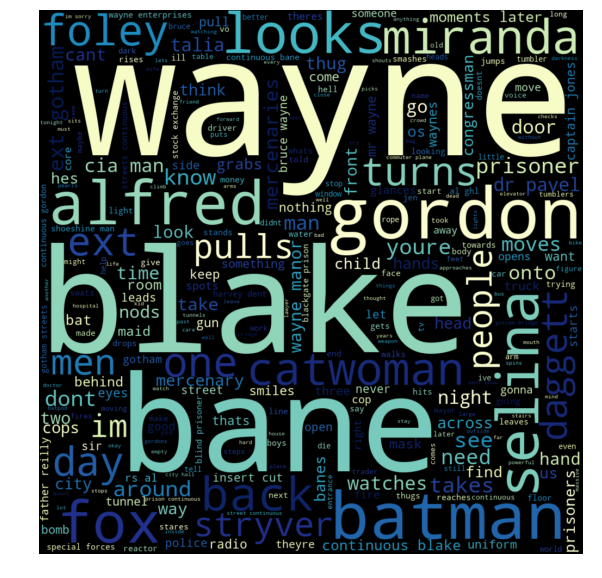

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud with Mask
This part of the tutorial assumes you are working in a Google Colaboratory environment - to run locally skip the following cell and replace `BytesIO(uploaded['female-portrait2.png'])` with the filepath for `female-portrait2.png`

In [ ]:
# If you're in colaboratory:

from google.colab import files
uploaded = files.upload()

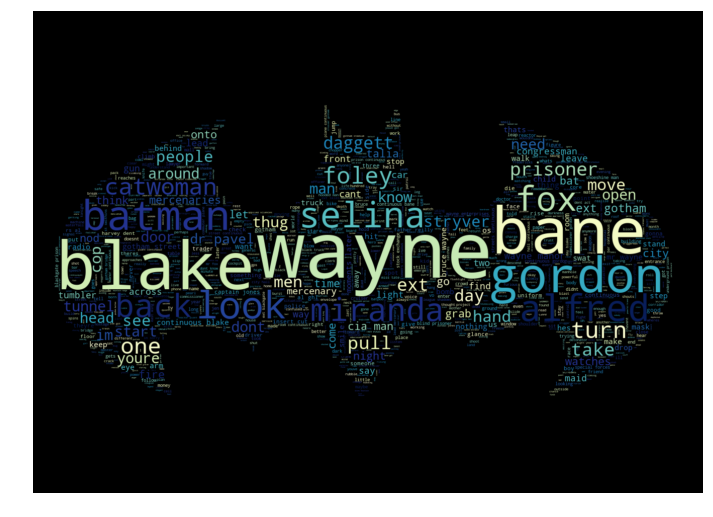

In [58]:
import numpy as np
from PIL import Image
from io import BytesIO

# If you're running locally, please open local file instead of running `BytesIO(uploaded['batman.png'])`
cloud_mask = np.array(Image.open(BytesIO(uploaded['batman.png'])))

wc = WordCloud(background_color="black",
                colormap='YlGnBu',
                max_words=5000,
                mask=cloud_mask)

word_cloud = wc.generate(string_words)

plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
word_cloud.to_file('bat_cloud.png')

# Only run the following line if you're in the colaboratory environment
files.download('bat_cloud.png')